<a href="https://colab.research.google.com/github/imyoungchae/YoungChaeSon/blob/main/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_Day11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#연결리스트

- **단순연결리스트**: 동적 메모리 할당을 이용해 리스트를 구현하는 가장 간단한 형태의 자료구조

동적 메모리 할당을 받아 노드를 저장하고 노드는 레퍼런스를 이용하여 다음 노드를 가리키도록 만들어 노드들을 한 줄로 연결시킴

대부분의 경우 배열은 빈 공간을 가지고 있으나 연결리스트는 빈공간 존재X

항목을 선택하려면 순차탐색을 해야한다

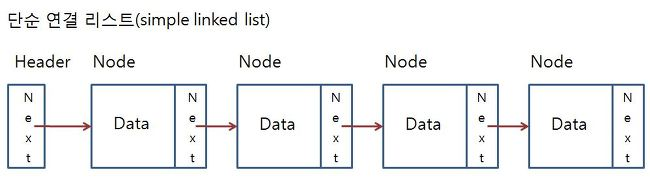

연결리스트 삽입

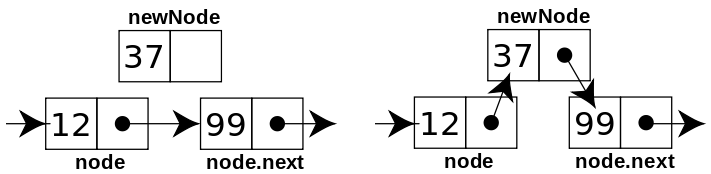

연결리스트 삭제

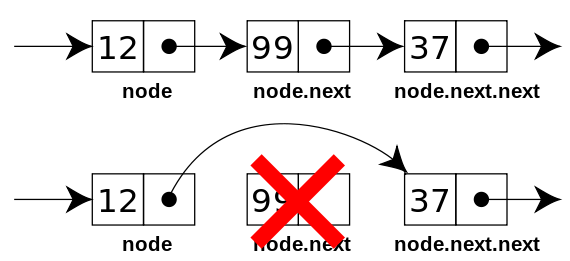

파일명: slist.py

In [16]:
class SList:

    class Node:

        def __init__(self, item, link):  # 노드 생성자

            self.item = item  # 항목

            self.next = link  # 다음 노드 레퍼런스

 

    def __init__(self):  # 단순 연결 리스트 생성자

        self.head = None

        self.size = 0  # 항목 수

   

    def size(self):

        return self.size

    def is_empty(self):

        return self.size == 0

   

    def insert_front(self, item):  # 연결 리스트의 맨 앞에 새 노드 삽입

        if self.is_empty():  # 연결 리스트가 empty인 경우

            self.head = self.Node(item, None)  # head가 새 노드 참조

        else: # empty가 아닌 경우

            self.head = self.Node(item, self.head)  # head가 새 노드 참조

        self.size += 1

 

    def insert_after(self, item, p):  # p가 가리키는 노드 다음에 새 노드 삽입

        p.next = SList.Node(item, p.next)  # 새 노드가 p 다음 노드가 됨

        self.size += 1

 

    def delete_front(self):  # p가 가리키는 노드의 앞 노드 삭제

        if self.is_empty():  # empty인 경우 에러 처리

            raise EmptyError('Underflow')

        else:

            self.head = self.head.next  # head가 둘째 노드를 참조

            self.size -= 1

       

    def delete_after(self, p):  # p가 가리키는 노드의 뒷 노드 삭제

        if self.is_empty():  # empty인 경우 에러 처리

            raise EmptyError('Underflow')

        t = p.next

        p.next = t.next  # p 다음 노드를 건너뛰어 연결

        self.size -= 1

 

    def search(self, target):  # 노드 탐색

        p = self.head

        for k in range(self.size):

            if target == p.item:

                return k  # 탐색 성공

            p = p.next

        return None  # 탐색 실패

 

    def print_list(self):

        p = self.head

        while p:

            if p.next != None:

                print(p.item, ' -> ', end='')

            else:

                print(p.item)

            p = p.next  # 노드들을 순차탐색

 

class EmptyError(Exception):  # 에러 처리

    pass
    




파일명: main.py

In [ ]:
from slist import SList  # slice.py에서 SList를 import

 

if __name__ == '__main__':  # 이 파이썬 모듈이 main이면

    s = SList()

    s.insert_front('orange')

    s.insert_front('apple')

    s.insert_after('cherry',s.head.next)

    s.insert_front('pear')

    s.print_list()

 

    print('cherry는 %d번째' % s.search('cherry'))

    print('kiwi는', s.search('kiwi'))

   

    print('배 다음 노드 삭제 후:\t\t', end='')

    s.delete_after(s.head)

    s.print_list()

 

    print('첫 노드 삭제 후:\t\t', end='')

    s.delete_front()

    s.print_list()

 

    print('첫 노드로 망고, 딸기 삽입 후:\t', end='')

    s.insert_front('mango')

    s.insert_front('strawberry')

    s.print_list()

    s.delete_after(s.head.next.next)

 

    print('오렌지 다음 노드 삭제 후:\t', end='')

    s.print_list()


두 개를 저장한 뒤 idle로 실행하면 오류 없이 단순 연결 리스트 확인 가능